## Capstone Two - D.C. Housing Prices : Exploratory Data Analysis(EDA)

In [2]:

# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
sns.set(style='whitegrid')


In [3]:
# Load dataset
df = pd.read_csv('DC_Properties.csv', low_memory=False)
df.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW


The dataset used is `DC_Properties.csv` which includes:
- Property characteristics (ROOMS, BEDRM, BATHRM, LANDAREA)
- Sale price (PRICE)
- Geographic identifiers (WARD, ZIPCODE, etc.)

In [5]:
# Basic cleaning: drop irrelevant columns, filter positive prices
cols_to_drop = ['Unnamed: 0', 'SOURCE', 'CMPLX_NUM', 'GIS_LAST_MOD_DTTM',
                'SQUARE', 'X', 'Y', 'NATIONALGRID']
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')
df = df[df['PRICE'] > 0]
df = df.drop_duplicates()

# Show structure
df.shape, df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 97832 entries, 0 to 158955
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BATHRM              97832 non-null  int64  
 1   HF_BATHRM           97832 non-null  int64  
 2   HEAT                97832 non-null  object 
 3   AC                  97832 non-null  object 
 4   NUM_UNITS           57899 non-null  float64
 5   ROOMS               97832 non-null  int64  
 6   BEDRM               97832 non-null  int64  
 7   AYB                 97720 non-null  float64
 8   YR_RMDL             57422 non-null  float64
 9   EYB                 97832 non-null  int64  
 10  STORIES             57866 non-null  float64
 11  SALEDATE            97831 non-null  object 
 12  PRICE               97832 non-null  float64
 13  QUALIFIED           97832 non-null  object 
 14  SALE_NUM            97832 non-null  int64  
 15  GBA                 57899 non-null  float64
 16  BLDG_NUM

((97832, 41), None)

## Summary statistics of the numeric columns

In [7]:
df.describe()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,...,BLDG_NUM,KITCHENS,FIREPLACES,USECODE,LANDAREA,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT
count,97832.000000,97832.000000,57899.000000,97832.000000,97832.000000,97720.000000,57422.000000,97832.000000,57866.000000,9.783200e+04,...,97832.000000,57898.000000,97832.000000,97832.000000,97832.000000,39933.000000,97832.000000,97832.000000,97832.000000,97832.00000
mean,1.862111,0.446071,1.221023,5.932435,2.612008,1944.808299,2000.645589,1965.741383,2.124669,7.203711e+05,...,1.000143,1.250855,3.535500,14.606928,2089.898806,883.974958,20012.283854,38.913948,-77.018059,5289.17805
std,0.978878,0.576652,0.623896,2.636882,1.392995,36.263753,16.167409,27.523843,3.948798,4.818953e+06,...,0.011962,0.661237,939.811792,3.689062,2769.294034,407.193188,16.347575,0.030153,0.039746,3285.15759
min,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,1.000000e+00,...,1.000000,0.000000,0.000000,11.000000,0.000000,199.000000,20001.000000,38.819731,-77.113909,100.00000
25%,1.000000,0.000000,1.000000,4.000000,2.000000,1917.000000,1991.000000,1954.000000,2.000000,2.400000e+05,...,1.000000,1.000000,0.000000,11.000000,484.000000,620.000000,20005.000000,38.896113,-77.042717,2201.00000
50%,2.000000,0.000000,1.000000,6.000000,3.000000,1938.000000,2005.000000,1965.000000,2.000000,3.999900e+05,...,1.000000,1.000000,0.000000,13.000000,1389.000000,784.000000,20010.000000,38.914201,-77.021489,5002.00000
75%,2.000000,1.000000,1.000000,7.000000,3.000000,1966.000000,2011.000000,1981.000000,2.000000,6.500000e+05,...,1.000000,1.000000,1.000000,17.000000,2565.000000,1050.000000,20017.000000,38.933749,-76.990586,8100.00000
max,12.000000,11.000000,6.000000,31.000000,20.000000,2018.000000,2019.000000,2018.000000,826.000000,1.374275e+08,...,2.000000,44.000000,293920.000000,117.000000,187301.000000,8553.000000,20392.000000,38.995435,-76.909758,11100.00000


Some numeric variables still contain null values.

## Univariate Analysis - Numerical Features

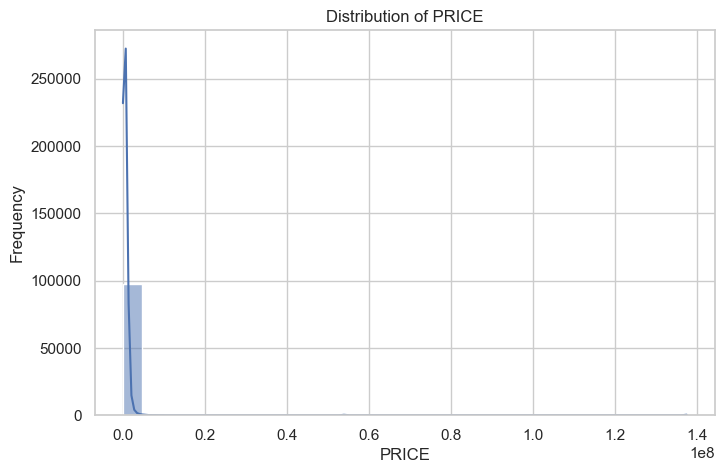

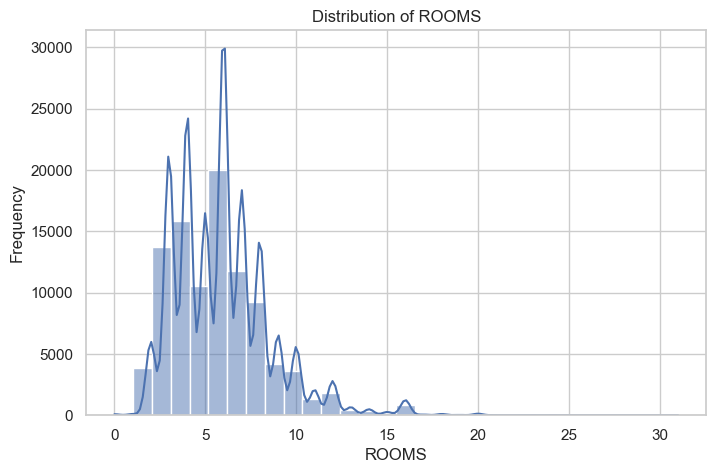

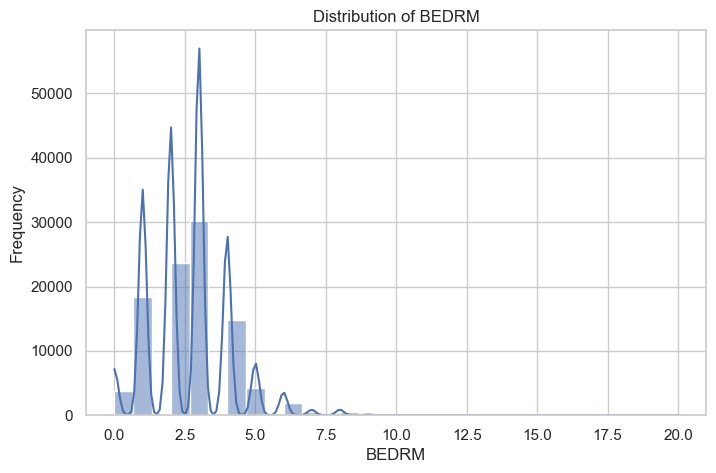

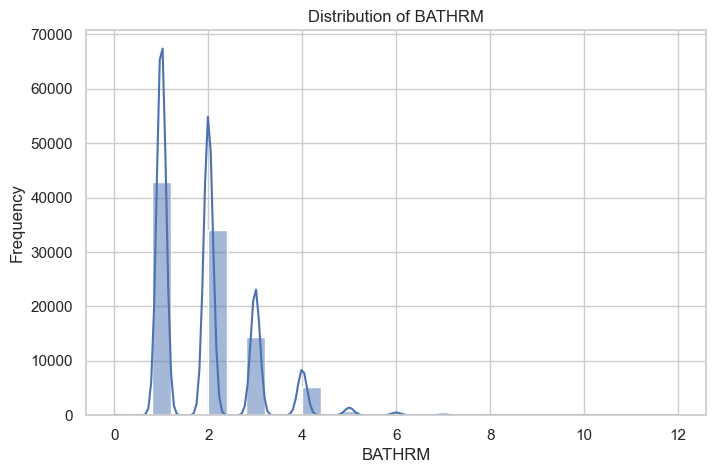

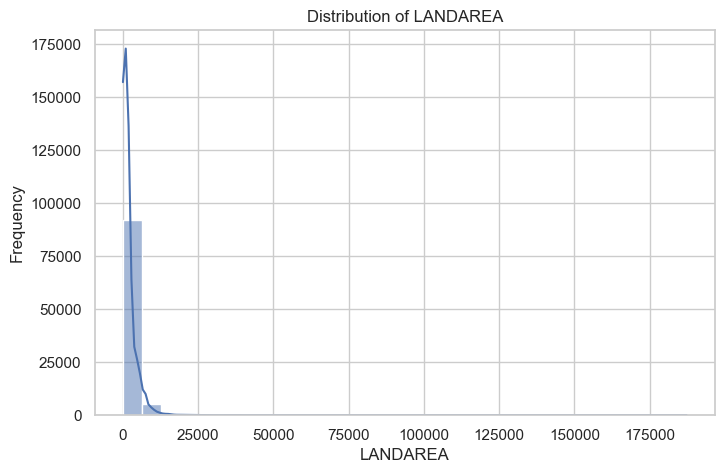

In [10]:

# Histogram for key numerical features
num_cols = ['PRICE', 'ROOMS', 'BEDRM', 'BATHRM', 'LANDAREA']
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


## Bivariate Analysis - Sale Price vs Other Features

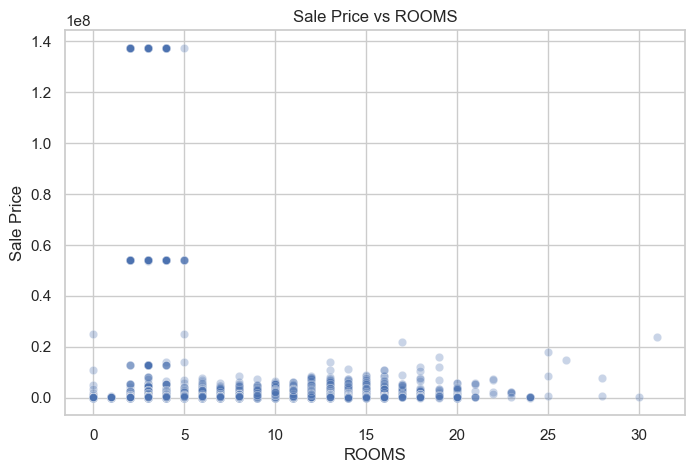

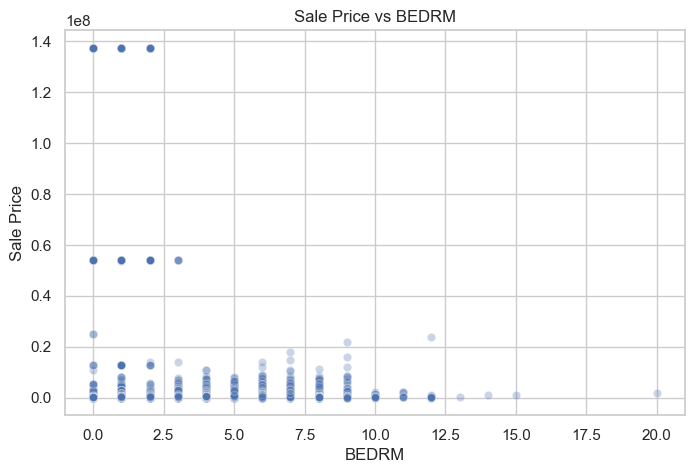

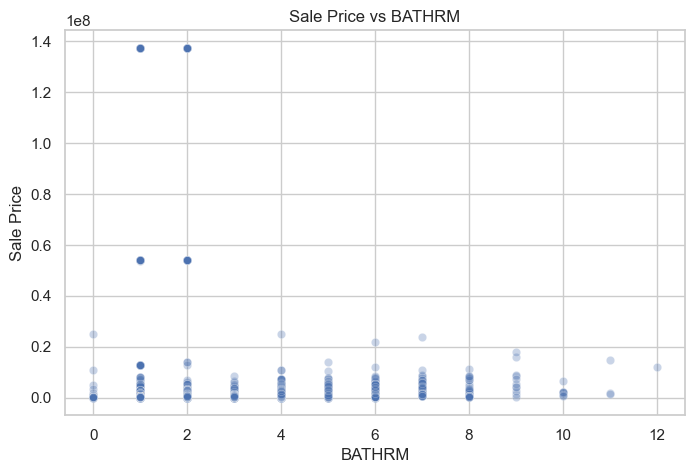

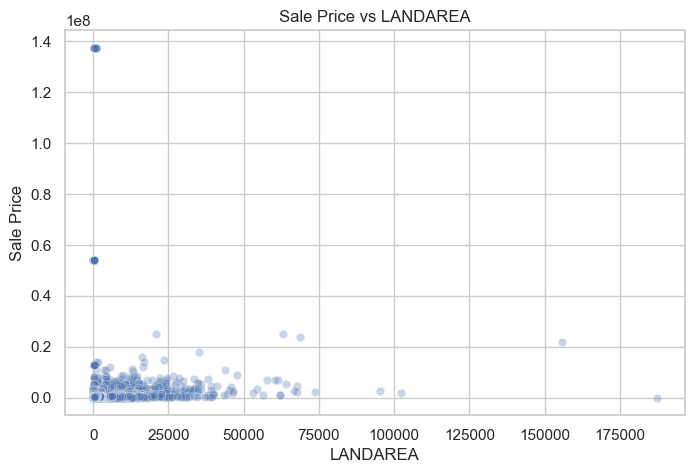

In [12]:

# Scatter plots between PRICE and other numerical features
for col in ['ROOMS', 'BEDRM', 'BATHRM', 'LANDAREA']:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=col, y='PRICE', alpha=0.3)
    plt.title(f'Sale Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Sale Price')
    plt.grid(True)
    plt.show()


## Pearson Correlation Matrix

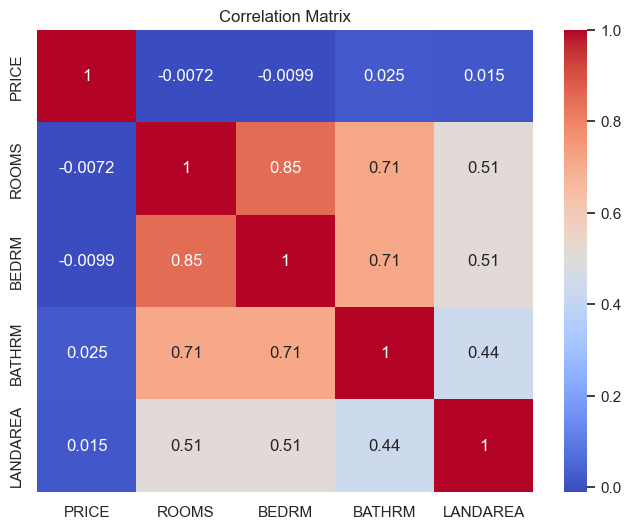

In [14]:

# Pearson correlation coefficients
corr = df[['PRICE', 'ROOMS', 'BEDRM', 'BATHRM', 'LANDAREA']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Average Sale Price by Ward

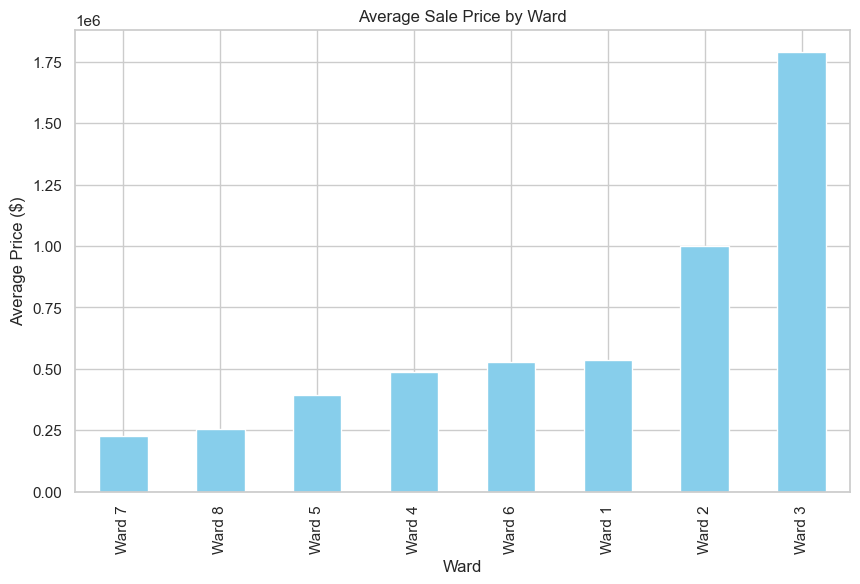

In [16]:

# Mean price by ward
ward_prices = df.groupby('WARD')['PRICE'].mean().sort_values()
plt.figure(figsize=(10,6))
ward_prices.plot(kind='bar', color='skyblue')
plt.title('Average Sale Price by Ward')
plt.xlabel('Ward')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.show()



## Observations & Feature Selection Justifications

- Variables such as **ROOMS**, **BATHRM**, and **LANDAREA** are positively correlated with **PRICE**.
- **BEDRM** has a weaker and more variable relationship.
- **WARD** appears to have strong location-based variation in price and should be considered via one-hot encoding.
- Features with very low correlation or too many missing values will be excluded in the modeling stage.
